# 

# BGC Argo
Chloe Cheng

Opening Argo data downloaded from https://fleetmonitoring.euro-argo.eu/float/6902909. To download: click the NetCDF download button under 'Stations Data' and enter email. In my experience, the link took a few days to arrive.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
ds = xr.open_dataset('bgc_argo/GL_PR_PF_6902909.nc')
ds 

<xarray.Dataset>
Dimensions:                   (TIME: 1501, LATITUDE: 1501, LONGITUDE: 1501,
                               POSITION: 1501, DEPTH: 1932)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2019-03-01T05:30:00 ... 2...
  * LATITUDE                  (LATITUDE) float32 -8.85 -8.85 ... -8.167 -8.167
  * LONGITUDE                 (LONGITUDE) float32 -140.6 -140.6 ... -142.2
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/46)
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    ...                        ...
    DOWN_IRRADIANCE412        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE412_QC     (TIME, DEPTH) float32 ...
    DOWN_IRRADIANCE490        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE490_QC     (TIME, DEPTH) float32 ...
    LGHT                      (TIME, DEPTH) float64 ...
    LGHT_QC                   (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  6902909
    institution:                    Laboratory of Oceanography of Villefranche
    institution_edmo_code:          490
    site_code:                       
    ...                             ...
    last_date_observation:          2024-04-09T01:46:00Z
    last_latitude_observation:      -8.16725
    last_longitude_observation:     -142.24309
    date_update:                    2024-04-19T06:49:52Z
    history:                        2024-04-19T06:49:52Z : Creation
    data_mode:                      M

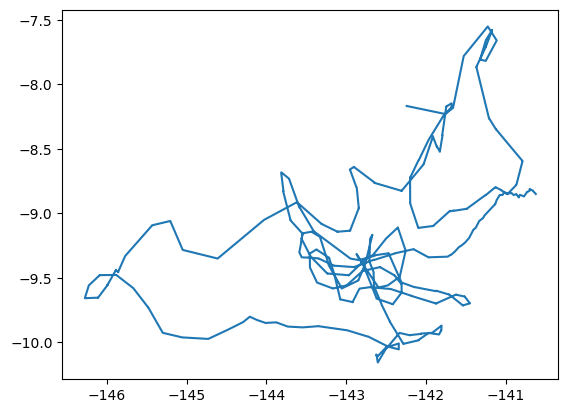

In [5]:
plt.plot(ds.LONGITUDE, ds.LATITUDE);

## Cleaning

The original dataset contains a lot of nans, so here we clean it by dropping data where every chlorophyll arrays where every time value is nan.

In [6]:
ds_clean = ds.dropna(dim='TIME', how='all', subset=['CPHL'])  # there are a lot of only-NaN times we need to drop
ds_clean

<xarray.Dataset>
Dimensions:                   (TIME: 218, LATITUDE: 1501, LONGITUDE: 1501,
                               POSITION: 1501, DEPTH: 1932)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2019-03-01T05:30:00 ... 2...
  * LATITUDE                  (LATITUDE) float32 -8.85 -8.85 ... -8.167 -8.167
  * LONGITUDE                 (LONGITUDE) float32 -140.6 -140.6 ... -142.2
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/46)
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    ...                        ...
    DOWN_IRRADIANCE412        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE412_QC     (TIME, DEPTH) float32 ...
    DOWN_IRRADIANCE490        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE490_QC     (TIME, DEPTH) float32 ...
    LGHT                      (TIME, DEPTH) float64 ...
    LGHT_QC                   (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  6902909
    institution:                    Laboratory of Oceanography of Villefranche
    institution_edmo_code:          490
    site_code:                       
    ...                             ...
    last_date_observation:          2024-04-09T01:46:00Z
    last_latitude_observation:      -8.16725
    last_longitude_observation:     -142.24309
    date_update:                    2024-04-19T06:49:52Z
    history:                        2024-04-19T06:49:52Z : Creation
    data_mode:                      M

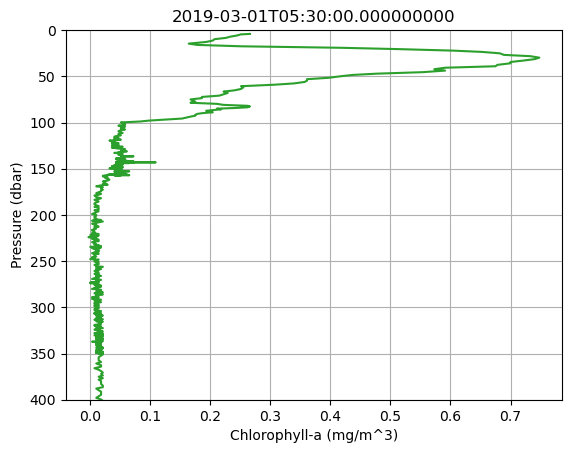

In [19]:
chla_sample = ds_clean.CPHL_ADJUSTED[0]
pressure_sample = ds_clean.PRES[0]

plt.plot(chla_sample, pressure_sample, color='tab:green')
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Chlorophyll-a (mg/m^3)')
plt.ylim(400,0)
plt.title(ds_clean.TIME[0].values)
plt.grid()
plt.savefig('figures/chlorophyll_profile.png', dpi=300, bbox_inches='tight')

## Deep Chlorphyll Max

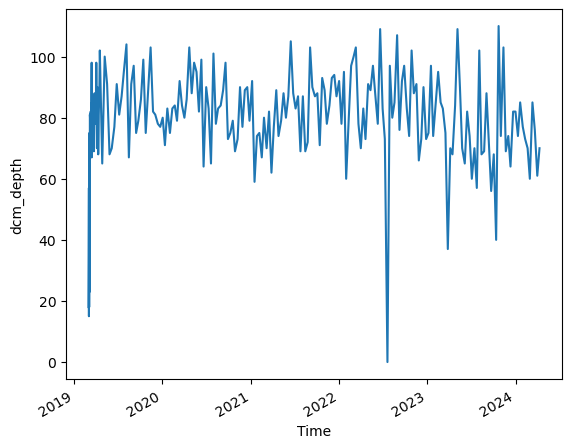

In [20]:
# Getting a quick DCM depth via argmax

dcm_index = ds_clean.CPHL_ADJUSTED.argmax(dim='DEPTH')
dcm_depth = ds_clean.DEPTH.isel(DEPTH=dcm_index)

ds_dcm_depth = xr.Dataset({'dcm_depth': dcm_depth})

ds_dcm = ds_clean.sel(DEPTH=dcm_depth)

ds_dcm = xr.merge([ds_dcm, ds_dcm_depth])
ds_dcm

ds_dcm.dcm_depth.plot()


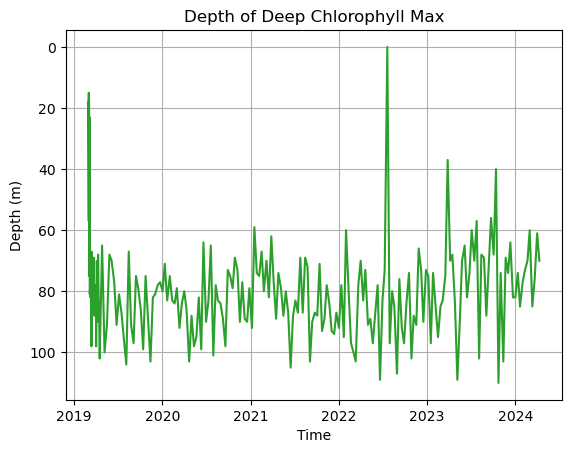

In [22]:
# Prettier plot

dcm_depth = ds_dcm.dcm_depth.values
dcm_time = ds_dcm.TIME.values

plt.plot(dcm_time, dcm_depth, color='tab:green')
plt.ylabel('Depth (m)')
plt.xlabel('Time')
plt.title('Depth of Deep Chlorophyll Max')

# Invert the y-axis
plt.gca().invert_yaxis()

plt.grid()
plt.savefig('figures/dcm_depth.png', dpi=300, bbox_inches='tight')

In [53]:
ds.CPHL_ADJUSTED

<xarray.DataArray 'CPHL_ADJUSTED' (TIME: 1501, DEPTH: 1932)>
array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [0.102, 0.102, 0.102, ...,   nan,   nan,   nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2019-03-01T05:30:00 ... 2024-04-09T01:46:00
Dimensions without coordinates: DEPTH
Attributes:
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:            Chlorophyll-a adjusted
    units:                mg m-3
    data_mode:            A
    ancillary_variables:  CPHL_ADJUSTED_QC

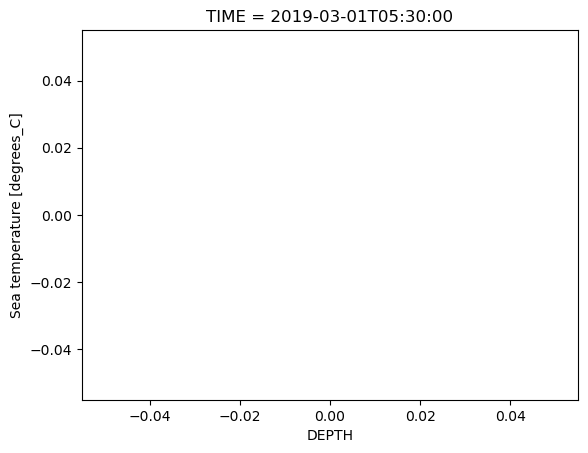

In [176]:
ds_clean.TEMP[0].plot()

In [67]:
ds_clean_temp = ds.dropna(dim='DEPTH', how='all', subset=['TEMP'])  # there are a lot of only-NaN times we need to drop
ds_clean_temp

<xarray.Dataset>
Dimensions:                   (TIME: 1501, LATITUDE: 1501, LONGITUDE: 1501,
                               POSITION: 1501, DEPTH: 232)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2019-03-01T05:30:00 ... 2...
  * LATITUDE                  (LATITUDE) float32 -8.85 -8.85 ... -8.167 -8.167
  * LONGITUDE                 (LONGITUDE) float32 -140.6 -140.6 ... -142.2
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/46)
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    ...                        ...
    DOWN_IRRADIANCE412        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE412_QC     (TIME, DEPTH) float32 ...
    DOWN_IRRADIANCE490        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE490_QC     (TIME, DEPTH) float32 ...
    LGHT                      (TIME, DEPTH) float64 ...
    LGHT_QC                   (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  6902909
    institution:                    Laboratory of Oceanography of Villefranche
    institution_edmo_code:          490
    site_code:                       
    ...                             ...
    last_date_observation:          2024-04-09T01:46:00Z
    last_latitude_observation:      -8.16725
    last_longitude_observation:     -142.24309
    date_update:                    2024-04-19T06:49:52Z
    history:                        2024-04-19T06:49:52Z : Creation
    data_mode:                      M

# Binning 

In [73]:
def plot_map(data, dir='', save=False, time_as_title=True, title=''):
    plt.figure(figsize=(8,7))
    ax = plt.subplot(2,1, 1, projection=ccrs.PlateCarree())
    im = ax.pcolormesh(data.lon, data.lat, np.squeeze(data.values), 
                       vmin=0, vmax=2, cmap='Spectral_r', transform=ccrs.PlateCarree())
    if time_as_title:
        if 'time' in data.dims: 
            date = np.datetime_as_string(data.time.values, unit='D')
            plt.title(date)
        else:
            ValueError('dataarray does not have time dimension')
    else:
        plt.title(title)

    ax.coastlines()
    ax.set_xticks(np.linspace(-146, -134, 7), crs=ccrs.PlateCarree())
    ax.set_yticks(np.linspace(-13, -6, 8), crs=ccrs.PlateCarree())

    # draw bounding box
    x_min, x_max = -142, -138
    y_min, y_max = -11, -8
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                        linewidth=1, edgecolor='w', facecolor='none')
    plt.gca().add_patch(rect)

    cbar = plt.colorbar(im, orientation='vertical')
    cbar.set_label(fr'Chlorophyll (mg/m$^3$)')
    if save and time_as_title:
        plt.savefig(f'{dir}/{date}.jpg', dpi=300, bbox_inches='tight')
        plt.close()
    else: plt.show()

ds = xr.open_dataset('../data/chlorophyll/ChlA_19970906-20240329_GSM.nc')
chla = ds.CHL1_mean

chla_region = chla.sel(lat=slice(-8, -11), lon=slice(-142, -138))

# take the area-weighted average
weights = np.cos(np.deg2rad(chla_region.lat))
chla_naive_avg = chla_region.weighted(weights).mean(dim=['lat', 'lon'])

# if there is not enough data, remove 
nan_counts = chla_region.isnull().sum(dim=('lat', 'lon'))
total_points = np.size(chla_region[0])

# threshold for greatest allowed proportion of missing data 
thresh = 0.3
missing_data_mask = nan_counts/total_points <= thresh
chla_avg = chla_naive_avg.where(missing_data_mask, other=np.nan)

# calculate a rolling average with a window of 12 months
chla_smooth = chla_naive_avg.rolling(time=12, center=True).mean()